# Проект
Представьте что вы DJ на вечеринке, и вам нужно быть уверенным что вы готовы к большой вечеринке. У вас не так много времени чтобы поставить все песни, с которыми вы работали. Но вы хотите быть уверенным что любой набор 30 песен из вашего большого плейлиста понравятся на вечеринке. Чтобы выяснить это используйте распределение выборок.

Данные для обработки хранятся в файле spotify_data.csv
- tempo
- energy
- instrumentalness
- liveness
- valences

In [12]:
# импортируем необходимые библиотеки
from hepler_functions import choose_statistic, population_distribution, sampling_distribution
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [3]:
# загружаем данные из файла
spotify_data = pd.read_csv('spotify_data.csv')
# посмотрим на несколько строк дата сета
print(spotify_data.head())
# в данном случае возьмем строку со значениями tempo вы можете взять любой столбец
song_tempos = spotify_data.tempo

     tempo  danceability  energy  instrumentalness  liveness  valence
0  156.985         0.831   0.814          0.013400    0.0556   0.3890
1  115.080         0.719   0.493          0.000000    0.1180   0.1240
2  218.050         0.850   0.893          0.000004    0.3720   0.0391
3  186.948         0.476   0.781          0.000000    0.1140   0.1750
4  147.988         0.798   0.624          0.000000    0.1660   0.5910


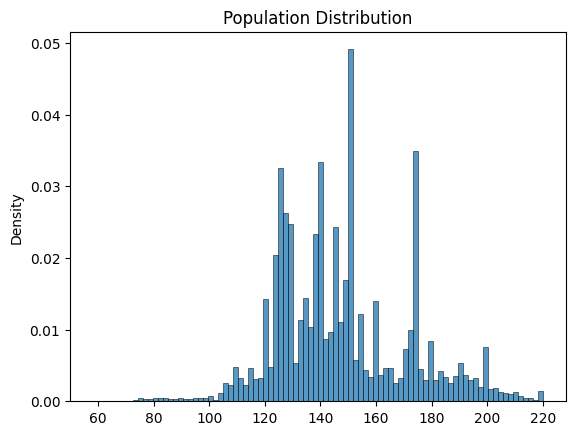

<Figure size 640x480 with 0 Axes>

In [4]:
# давайте воспользуемся нашей функцией popoulation_distribution и построим график всех данных
population_distribution(song_tempos)

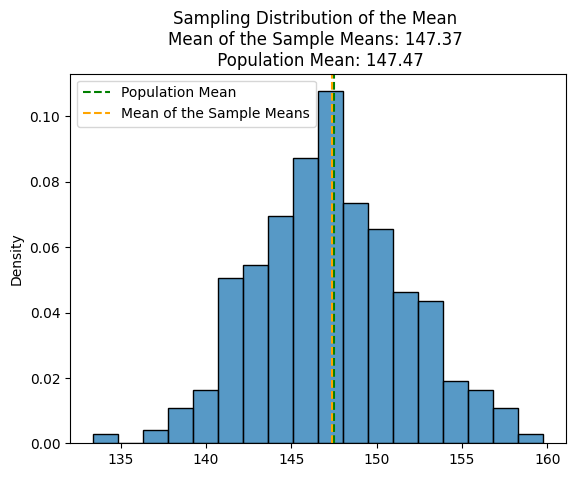

<Figure size 640x480 with 0 Axes>

In [5]:
# А теперь построим график распределения средних значений выборок используя метод sampling_distribution
# размер выборки укажем 30
sampling_distribution(song_tempos, 30, 'Mean')

Из графика легко заметно что среднее значение выборок очень близко к среднему значению всей популяции таким образом мы еще раз доказали что среднее значение выборок является не смещенным значением (unbiased estimator)

Давайте попробуем рассчитать распределение минимального значения вборок

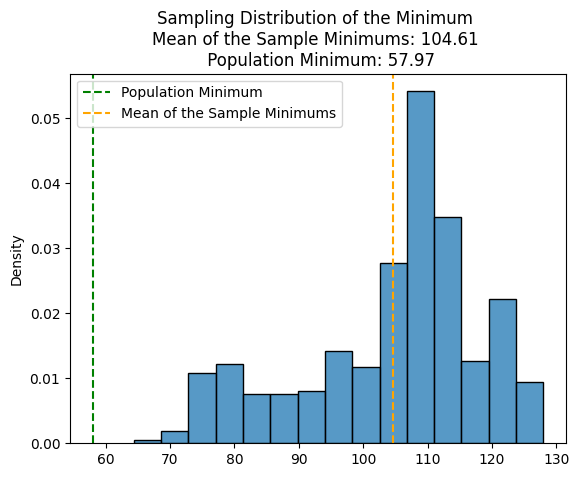

<Figure size 640x480 with 0 Axes>

In [8]:
sampling_distribution(song_tempos, 30, 'Minimum')

Тут уже заметно другая картина. Среднее значение минимальных значений выборок сильно смещено от минимального значения всей популяции.

Давайте посмотрим что произойдет со дисперсией / отклонением (variance)

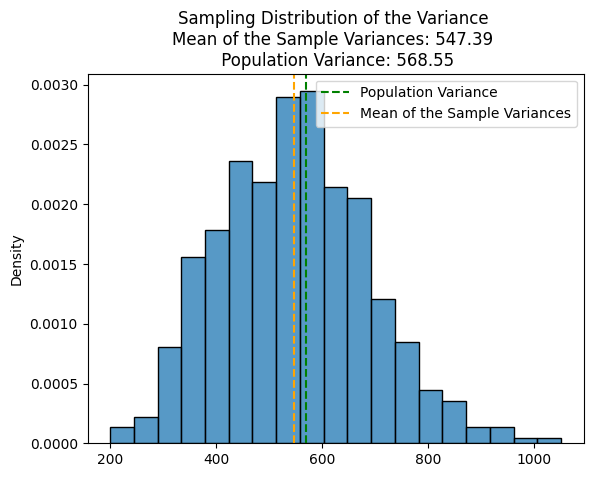

<Figure size 640x480 with 0 Axes>

In [10]:
sampling_distribution(song_tempos, 30, 'Variance')

Дисперсия также явялется unbiased estimator

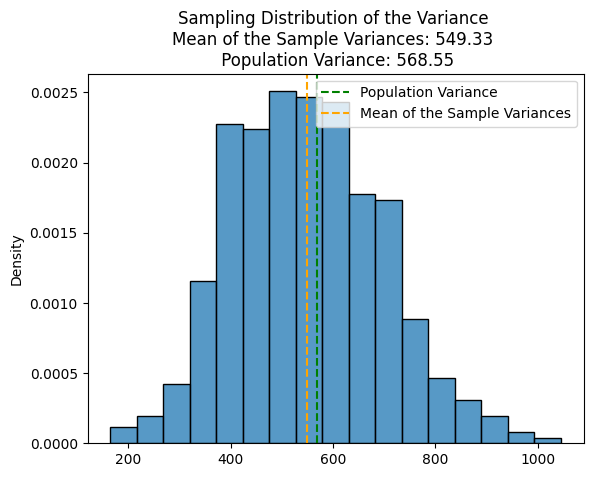

<Figure size 640x480 with 0 Axes>

In [13]:
# На этом этапе я изменил строку 16 в нашей библиотеке добавив параметр ddof = 1
# посмотрим что произойдет с распределением на этот раз
sampling_distribution(song_tempos, 30, 'Variance')

## Расчет вероятностей

In [17]:
# для начала посчитаем среднее значение популяции и его стандартное отклонение
population_mean = np.mean(song_tempos)
population_std = np.std(song_tempos)
# посчитаем стандартную ошибку
standard_error = population_std / np.sqrt(30)
# у вас есть подозрение что если среднее значение темпа 30 мелодий будет ниже 140 то выборка песен никому не понравится давайте посмотрим какова вероятность того что среднее значение будет 140 или ниже
print(stats.norm.cdf(140, population_mean, standard_error))
# также вечеринка будет просто супер если среднее значние темпа выборки будет 150 или выше давайте рассчитаем вероятность
print(1-stats.norm.cdf(150, population_mean, standard_error))

0.043003550159587636
0.2808802810182194


Таким образом получаем что
- вероятность того что среднее значение темпа 30 случайных песен будет 140 или ниже равна всего 4%
- вероятность того что среднее значение темпа 30 случайных песен будет 150 или выше равна 28% что является очень даже неплохим шансом запомнится на вечеринке